In [207]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import math
import os
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode
import random

In [208]:
def find_fonts(directory, extensions=['.ttf', '.otf']):
    font_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.endswith(ext) for ext in extensions):
                font_paths.append(os.path.join(root, file))
    return font_paths

In [209]:
def get_glyphs(font_path):
    font = TTFont(font_path)
    cmap = font.getBestCmap()
    glyphs = []
    for code, _ in cmap.items():
        symbol = chr(code)
        if symbol in [' ', '']:
            continue
        glyphs.append(symbol)
    return glyphs



In [210]:
directory = 'fonts'  # Замените на путь к вашей директории
font_paths = find_fonts(directory)
font_paths

['fonts/Aguante/Aguante-Regular.otf',
 'fonts/Ghastly Panic/GhastlyPanicCyr.otf',
 'fonts/Brass Mono/BrassMono-Regular.ttf',
 'fonts/Brass Mono/BrassMono-Italic.ttf',
 'fonts/Brass Mono/BrassMono-BoldItalic.ttf',
 'fonts/Brass Mono/BrassMono-Bold.ttf',
 'fonts/Better VCR/better-vcr-5.2.ttf',
 'fonts/Sans Collegiate One/AlumniSansCollegiateOne-Italic.ttf',
 'fonts/Sans Collegiate One/AlumniSansCollegiateOne-Regular.ttf',
 'fonts/Ganesha Type/GaneshaType-Regular.ttf',
 'fonts/Tana Uncial SP/TanaUncialSP.otf',
 'fonts/Realest/Realest-Extended.otf',
 'fonts/Aref Ruqaa Ink/ArefRuqaaInk-Regular.ttf',
 'fonts/Aref Ruqaa Ink/ArefRuqaaInk-Bold.ttf',
 'fonts/Ambidexter/ambidexter_regular.otf']

In [211]:
def get_font_name(font_path):
    base_name = os.path.basename(font_path)  # Получаем имя файла
    font_name = os.path.splitext(base_name)[0]  # Удаляем расширение
    return font_name

In [212]:
get_font_name(font_paths[1])

'GhastlyPanicCyr'

In [213]:
 # Замените на путь к вашему файлу шрифта
glyphs = get_glyphs(font_paths[0])
for symbol in glyphs:
    print(f'Symbol: {symbol}')

Symbol: !
Symbol: "
Symbol: #
Symbol: $
Symbol: &
Symbol: '
Symbol: (
Symbol: )
Symbol: *
Symbol: +
Symbol: ,
Symbol: -
Symbol: .
Symbol: /
Symbol: 0
Symbol: 1
Symbol: 2
Symbol: 3
Symbol: 4
Symbol: 5
Symbol: 6
Symbol: 7
Symbol: 8
Symbol: 9
Symbol: :
Symbol: ;
Symbol: <
Symbol: =
Symbol: >
Symbol: ?
Symbol: @
Symbol: A
Symbol: B
Symbol: C
Symbol: D
Symbol: E
Symbol: F
Symbol: G
Symbol: H
Symbol: I
Symbol: J
Symbol: K
Symbol: L
Symbol: M
Symbol: N
Symbol: O
Symbol: P
Symbol: Q
Symbol: R
Symbol: S
Symbol: T
Symbol: U
Symbol: V
Symbol: W
Symbol: X
Symbol: Y
Symbol: Z
Symbol: [
Symbol: \
Symbol: ]
Symbol: _
Symbol: `
Symbol: a
Symbol: b
Symbol: c
Symbol: d
Symbol: e
Symbol: f
Symbol: g
Symbol: h
Symbol: i
Symbol: j
Symbol: k
Symbol: l
Symbol: m
Symbol: n
Symbol: o
Symbol: p
Symbol: q
Symbol: r
Symbol: s
Symbol: t
Symbol: u
Symbol: v
Symbol: w
Symbol: x
Symbol: y
Symbol: z
Symbol: {
Symbol: |
Symbol: }
Symbol:  
Symbol: ¡
Symbol: ¢
Symbol: £
Symbol: ¥
Symbol: ¦
Symbol: ¨
Symbol: ¯
Symbol: ´


In [214]:

def create_img(text, font_path, font_size, lines=1, img_size=(128, 128), shift=None):
    # Создаем новое изображение с RGB режимом, размером 256x256 и белым цветом
    img = Image.new('L', img_size, color=255)

    # Создаем объект ImageDraw
    d = ImageDraw.Draw(img)

    # Загружаем шрифт
    font = ImageFont.truetype(font_path, font_size)

    # Разбиваем текст на строки
    words = text.split(' ')
    words_in_line = math.ceil(len(words) / lines)
    lines = [' '.join(words[i: i + words_in_line]) for i in range(0, len(words), words_in_line)]

    # Вычисляем y_indent и h вне цикла
    bbox = d.textbbox((0, 0), lines[0], font)
    h = bbox[3]
    y_indent = (img.height - h * len(lines)) / (len(lines) + 1)

    # Добавляем каждую строку текста на изображение
    for i, line in enumerate(lines):
        # Рассчитываем ширину текста
        w = bbox[2]

        # Рассчитываем координаты x,y текста
        x = (img.width - w) / 2
        y = y_indent * (i + 1) + h * i

        if shift:
            x_shift = img.width * shift * (random.random() - 0.5) * 2
            y_shift = img.height * shift * (random.random() - 0.5) * 2 // (len(lines))
            x += x_shift
            y += y_shift

        # Добавляем текст на изображение
        d.text((x, y), line, fill=(0), font=font)

    # Возвращаем изображение
    return img



In [215]:
# Открываем файл для чтения
with open('texts/Little_Red_Cap_ Jacob_and_Wilhelm_Grimm.txt', 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
words = text_r.split()

# Разбиваем список слов на части по 5 слов
chunk_lenth = 3
chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

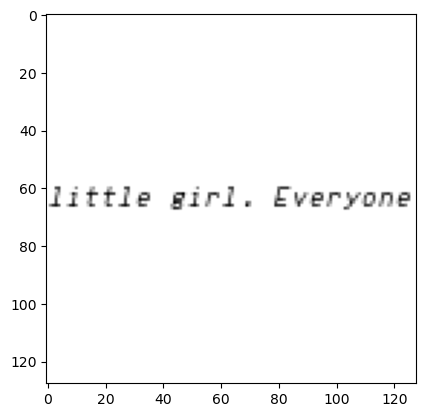

In [216]:
# Выводим изображение

text = "AA cc"
font_path = "fonts/Brass Mono/BrassMono-Italic.ttf"
font_size = 10
img = create_img(chunks[5], font_path, font_size, lines=1, 
                 #shift=0.3
                 )

plt.imshow(img, cmap='gray')
plt.show()

In [217]:
glyphs = get_glyphs(font_paths[0])
print(glyphs)

['!', '"', '#', '$', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '\xa0', '¡', '¢', '£', '¥', '¦', '¨', '¯', '´', '·', '¸', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'à', 'á', 'â', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'ÿ', 'Ā', 'ā', 'Ć', 'ć', 'Ĉ', 'ĉ', 'Ċ', 'ċ', 'Č', 'č', 'Ď', 'ď', 'Ē', 'ē', 'Ė', 'ė', 'Ě', 'ě', 'Ĝ', 'ĝ', 'Ġ', 'ġ', 'Ĥ', 'ĥ', 'Ĩ', 'ĩ', 'Ī', 'ī', 'İ', 'Ĵ', 'ĵ', 'Ĺ', 'ĺ', 'Ľ', 'ľ', 'Ń', 'ń', 'Ň', 'ň', 'Ō', 'ō', 

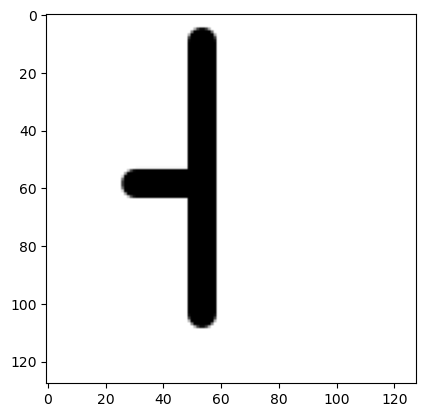

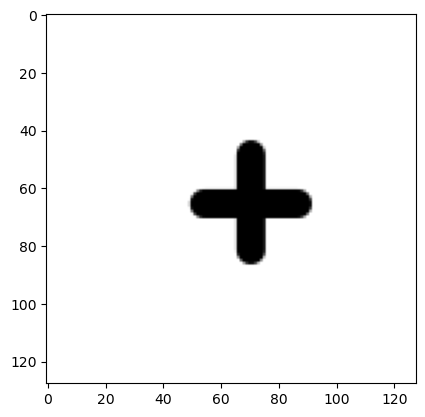

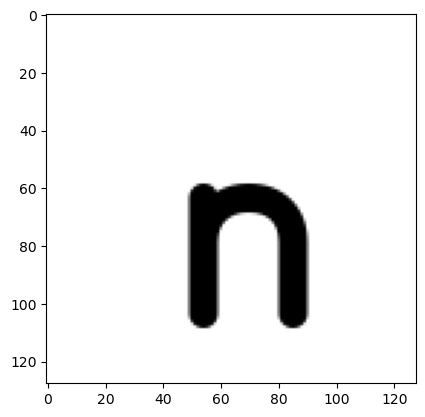

In [218]:
glyphs = get_glyphs(font_paths[5])

for glyph in random.sample(glyphs, 3):
    font_path = font_paths[5]
    font_size = 100
    img = create_img(glyph, font_path, font_size, shift=0.1)

    plt.imshow(img, cmap='gray')
    plt.show()

In [219]:
DS_PATH='dataset'

In [222]:
# Открываем файл для чтения
with open("texts/J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
words = text_r.split()

# Разбиваем список слов на части по 5 слов
chunk_lenth = 3
chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]

In [224]:
with open('texts/Little_Red_Cap_ Jacob_and_Wilhelm_Grimm.txt', 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()
with open("texts/J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", 'r') as file:
    # Читаем содержимое файла
    text_r = file.read()

for font_path in font_paths:
    font_name = get_font_name(font_path)
    font_ds_path = DS_PATH + '/' + font_name
    os.makedirs(font_ds_path, exist_ok=True)

    os.makedirs(font_ds_path + '/glyphs', exist_ok=True)
    glyphs = get_glyphs(font_path)
    for i, glyph in enumerate(glyphs):
        font_size = 100
        img = create_img(
            glyph, 
            font_path, 
            font_size, 
            #lines = 2,
            #shift=0.1
            )
        img.save(f'{font_ds_path}/glyphs/{i}.png')
    for i, glyph in enumerate(glyphs):
        font_size = 8
        img = create_img(
            glyph, 
            font_path, 
            font_size, 
            #lines = 2,
            shift=0.5
            )
        img.save(f'{font_ds_path}/glyphs/small{i}.png')
    for i in range(len(glyphs) // 2):
        text = ''.join(random.sample(glyphs, 2)) + ' ' + ''.join(random.sample(glyphs, 2))
        img = create_img(text, font_path, font_size=60, lines=2)
        img.save(f'{font_ds_path}/glyphs/4_{i}.png')

    for i in range(len(glyphs)* 4):
        text = ' '.join([''.join(random.sample(glyphs, 2)) for _ in range(8)])
        img = create_img(text, font_path, font_size=8, lines=4, shift=0.5)
        img.save(f'{font_ds_path}/glyphs/small_2_{i}.png')

    # Формирование по 16 случайных глифов по 4 глифа вместе
    for i in range(len(glyphs) // 2):
        text = ' '.join([''.join(random.sample(glyphs, 4)) for _ in range(4)])
        img = create_img(text, font_path, font_size=30, lines=4)
        img.save(f'{font_ds_path}/glyphs/16_{i}.png')
    # Формирование по 64 случайных глифов по 4 глифа вместе
    for i in range(len(glyphs) // 2):
        text = ' '.join([''.join(random.sample(glyphs, 4)) for _ in range(18)])
        img = create_img(text, font_path, font_size=14, lines=6)
        img.save(f'{font_ds_path}/glyphs/72_{i}.png')

    os.makedirs(font_ds_path + '/text', exist_ok=True)
    

    words = text_r.split()

    # Разбиваем список слов на части по 5 слов
    chunk_lenth = 3
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]
    for i, chunk in enumerate(chunks):
        lines = 1
        img = create_img(
            chunk, 
            font_path, 
            font_size=10, 
            lines = lines,
            #shift=0.1
            )
        img.save(f'{font_ds_path}/text/lines{lines}_{i}.png')

    chunk_lenth = 15
    lines = 5
    chunks = [' '.join(words[i:i+chunk_lenth]) for i in range(0, len(words), chunk_lenth)]
    for i, chunk in enumerate(chunks):
        
        img = create_img(
            chunk, 
            font_path, 
            font_size=10, 
            lines = lines,
            shift=0.1
            )
        img.save(f'{font_ds_path}/text/lines{lines}_{i}.png')


    

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
from joblib import Parallel, delayed
from tqdm import tqdm

def process_glyphs(i, glyph, font_path, font_ds_path, font_size, shift=None):
    img = create_img(glyph, font_path, font_size, shift=shift)
    img.save(f'{font_ds_path}/glyphs/{i}.png')

def process_text_chunks(i, chunk, font_path, font_ds_path, lines, font_size, shift=None):
    img = create_img(chunk, font_path, font_size, lines, shift=shift)
    img.save(f'{font_ds_path}/text/lines{lines}_{i}.png')

for font_path in font_paths:
    font_name = get_font_name(font_path)
    font_ds_path = DS_PATH + '/' + font_name
    os.makedirs(font_ds_path, exist_ok=True)
    os.makedirs(font_ds_path + '/glyphs', exist_ok=True)

    glyphs = get_glyphs(font_path)
    Parallel(n_jobs=-1)(delayed(process_glyphs)(i, glyph, font_path, font_ds_path, 100) for i, glyph in enumerate(tqdm(glyphs, desc='Processing glyphs')))
    Parallel(n_jobs=-1)(delayed(process_glyphs)(i, glyph, font_path, font_ds_path, 8, 0.5) for i, glyph in enumerate(tqdm(glyphs, desc='Processing glyphs')))

    for i in range(len(glyphs) // 2):
        text = ''.join(random.sample(glyphs, 2)) + ' ' + ''.join(random.sample(glyphs, 2))
        process_text_chunks(i, text, font_path, font_ds_path, 2, 60)

    for i in range(len(glyphs) * 4):
        text = ' '.join([''.join(random.sample(glyphs, 2)) for _ in range(8)])
        process_text_chunks(i, text, font_path, font_ds_path, 4, 8, 0.5)

    for i in range(len(glyphs) // 2):
        text = ' '.join([''.join(random.sample(glyphs, 4)) for _ in range(4)])
        process_text_chunks(i, text, font_path, font_ds_path, 4, 30)

    for i in range(len(glyphs) // 2):
        text = ' '.join([''.join(random.sample(glyphs, 4)) for _ in range(18)])
        process_text_chunks(i, text, font_path, font_ds_path, 6, 14)

    os.makedirs(font_ds_path + '/text', exist_ok=True)
    words = text_r.split()
    chunks = [' '.join(words[i:i+3]) for i in range(0, len(words), 3)]
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(i, chunk, font_path, font_ds_path, 1, 10) for i, chunk in enumerate(tqdm(chunks, desc='Processing text chunks')))

    chunks = [' '.join(words[i:i+15]) for i in range(0, len(words), 15)]
    Parallel(n_jobs=-1)(delayed(process_text_chunks)(i, chunk, font_path, font_ds_path, 5, 10, 0.1) for i, chunk in enumerate(tqdm(chunks, desc='Processing text chunks')))
